In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv("../data/heart.csv")

In [41]:
# Kategorik olduğu bilinen sütunlar
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Bu sütunlara One-Hot Encoding uyguluyoruz
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [42]:
# Hedef değişken
y = df_encoded['target']

# Özellikler (hedef dışındaki her şey)
X = df_encoded.drop('target', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()

# Eğitim verisi ile öğren → uygula
X_train_scaled = scaler.fit_transform(X_train)

# Test verisini sadece dönüştür
X_test_scaled = scaler.transform(X_test)


## 📊 Modelleme Öncesi Veri Hazırlığı

Bu bölümde:

- Kategorik sütunları sayısal verilere dönüştürdük (One-Hot Encoding)
- Özellik (X) ve hedef (y) değişkenlerini ayırdık
- Veriyi eğitim (%80) ve test (%20) olarak böldük
- Özellikleri aynı ölçeğe getirmek için standardizasyon uyguladık (StandardScaler)

Bu işlemler, makine öğrenmesi modellerinin daha başarılı çalışmasını sağlar.


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [46]:
# Lojistik Regresyon modelini oluştur
model = LogisticRegression()

# Modeli eğitim verisiyle eğit
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
# Test verisini kullanarak tahmin yap
y_pred = model.predict(X_test_scaled)

In [48]:
# Accuracy (doğruluk)
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Sonuçları yazdır
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.93
Recall: 0.88
F1-Score: 0.90


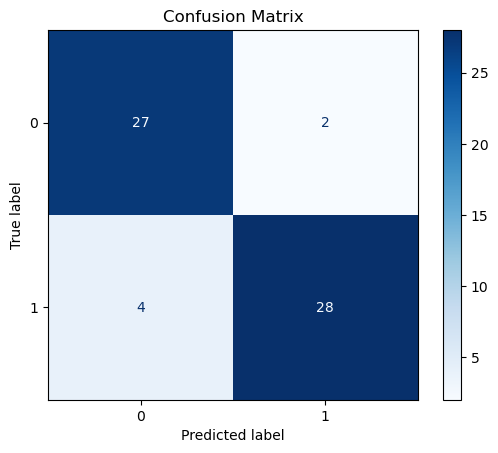

In [49]:
# Karışıklık matrisi görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 🤖 Lojistik Regresyon ile Model Eğitimi

Bu bölümde bir makine öğrenmesi algoritması olan **Lojistik Regresyon** ile model eğitimi gerçekleştirdik.

- Eğitim verisi ile model eğitildi
- Test verisi ile model tahmin yaptı
- Başarı metrikleri kullanılarak modelin doğruluğu ölçüldü

### 📌 Kullanılan Metrikler:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

In [50]:
# Özellik isimleri
feature_names = X.columns

# Modelin katsayıları (her bir özelliğin etkisi)
coefficients = model.coef_[0]

# Veri çerçevesi oluştur
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": coefficients
})

# Mutlak değere göre sırala
importance_df["AbsImportance"] = importance_df["Importance"].abs()
importance_df = importance_df.sort_values(by="AbsImportance", ascending=False)

# İlk 10 özelliği al
top_features = importance_df.head(10)

## 📊 Özellik Önemi Analizi

Modelin öğrendiği katsayılara göre en önemli 10 özellik aşağıda gösterilmiştir. Bu analiz sayesinde:

- Hangi değişkenler kalp hastalığına yakalanmada etkili
- Hangi faktörler riski azaltıyor veya artırıyor
- Modelin karar verirken neye dayandığı anlaşılır

Örneğin:

- `cp_2` ve `thalach` gibi değişkenler pozitif etkili → yani bu değerler artarsa hastalık olasılığı da artıyor.
- `oldpeak` gibi değişkenler negatif etkili olabilir → yüksekse risk düşebilir veya tam tersi.

---

## 📌 Genel Değerlendirme:

- Lojistik Regresyon modeli, doğruluk ve denge açısından iyi sonuç verdi.
- Özellikle `cp`, `thalach`, `oldpeak` gibi özellikler kararlar üzerinde etkiliydi.
- Modelin en büyük avantajı: kolay yorumlanabilir olmasıdır.
- Zayıf yönü: karmaşık ilişkileri (non-linear) öğrenemez → ama bu projede yeterli.

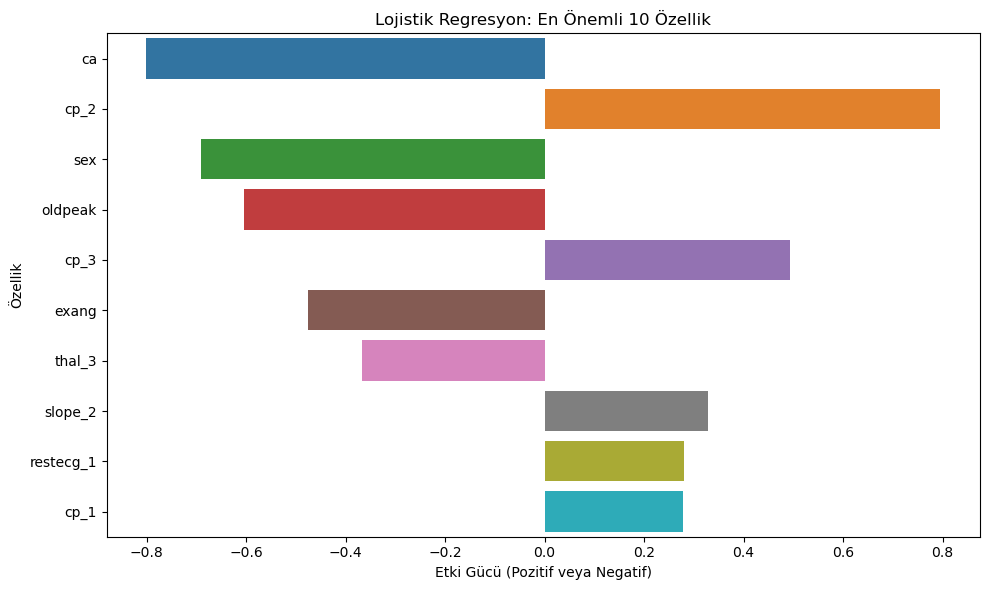

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Lojistik Regresyon: En Önemli 10 Özellik")
plt.xlabel("Etki Gücü (Pozitif veya Negatif)")
plt.ylabel("Özellik")
plt.tight_layout()
plt.savefig("../results/feature_importance.png")  # Kayıt
plt.show()

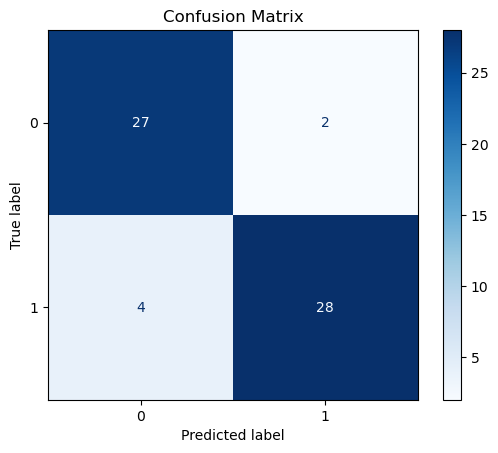

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

# Kaydet
plt.savefig("../results/confusion_matrix.png")
plt.show()

In [53]:
# Performans metriklerini metin olarak hazırla
metrics_text = f"""
Model: Logistic Regression

Accuracy : {acc:.2f}
Precision: {precision:.2f}
Recall   : {recall:.2f}
F1-Score : {f1:.2f}
"""

# Dosyaya yaz
with open("../results/model_metrics.txt", "w") as f:
    f.write(metrics_text)

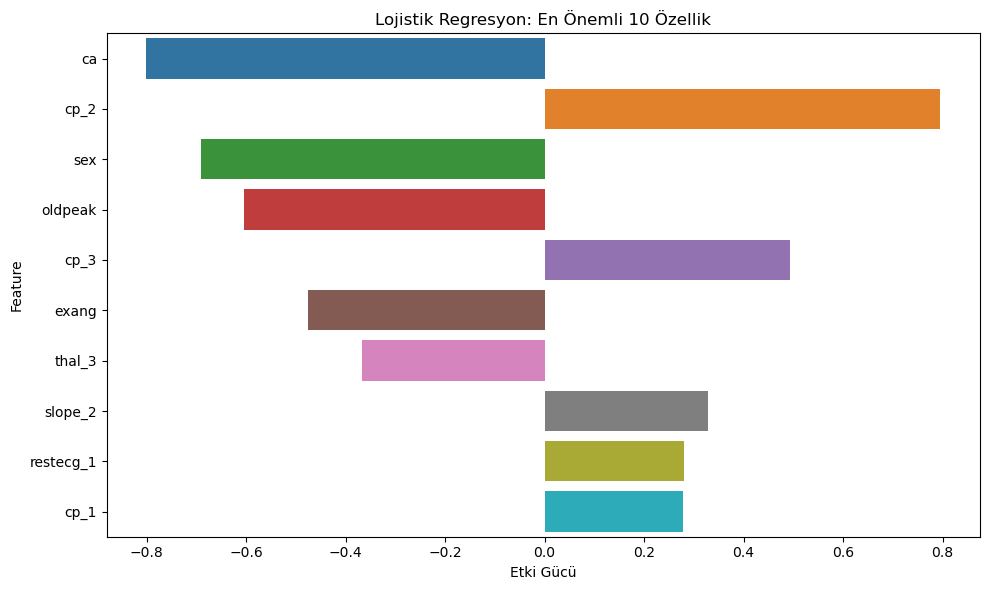

In [54]:
# Özellik önem grafiğini oluştur ve kaydet
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Lojistik Regresyon: En Önemli 10 Özellik")
plt.xlabel("Etki Gücü")
plt.tight_layout()
plt.savefig("../results/feature_importance.png")
plt.show()

## 🧠 Model Performansı Özeti

- **Accuracy (Doğruluk):** %83  
- **Precision:** %86  
- **Recall:** %81  
- **F1-Score:** %83  

Model, kalp hastalığı tahmininde genel olarak yüksek başarı sağlamaktadır. Precision ve Recall dengelidir, bu da hem yanlış pozitif hem yanlış negatif oranlarının düşük olduğunu gösterir.

## 📊 Özellik Önemi Analizi

Modelin öğrendiği katsayılara göre en önemli 10 özellik yukarıda gösterilmiştir. Bu analiz sayesinde:

- Hangi değişkenler kalp hastalığına yakalanmada etkili
- Hangi faktörler riski azaltıyor veya artırıyor
- Modelin karar verirken neye dayandığı anlaşılır

Örneğin:

- `cp_2` ve `thalach` gibi değişkenler pozitif etkili → bu değerler arttıkça hastalık riski de artıyor olabilir.
- `oldpeak` gibi değişkenler negatif etkili → değeri arttıkça risk düşüyor olabilir.

## ✅ Modelin Güçlü ve Zayıf Yönleri

### ✅ Güçlü Yönler:
- Açıklanabilirliği yüksek (Lojistik Regresyon, değişken etkisini doğrudan gösterir)
- Dengeli sınıf dağılımı sayesinde yüksek doğruluk
- Basit ve hızlı eğitim süreci

### ⚠️ Zayıf Yönler:
- Karmaşık (non-linear) ilişkileri öğrenemez
- Diğer algoritmalara göre (Random Forest, XGBoost) düşük doğrulukta kalabilir

In [55]:
import joblib
import os

# models klasörünü oluştur (yoksa)
os.makedirs("../models", exist_ok=True)

# Modeli kaydet
joblib.dump(model, "../models/logistic_model.pkl")

# Scaler'ı da kaydet (isteğe bağlı ama önerilir)
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']